In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [4]:
df= pd.read_csv('malign_comments_train.csv')

In [43]:
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [45]:
import re

In [53]:
import nltk
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english'))

In [57]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [58]:
def text_cleaner(text):
    clean_text = re.sub(r'@[A-Za-z0-9]+','',text)
    clean_text = re.sub('#','',clean_text)
    clean_text = re.sub(r"'s\b",'',clean_text)
    clean_text = re.sub(r'[%$#@&}{]','',clean_text)
    clean_text = re.sub(r'[.,:;!]','',clean_text)
    letters_only = re.sub("[^a-zA-Z]",' ',clean_text)
    
    lower_case = letters_only.lower()
    tokens = [w for w in lower_case.split() if not w in stop_words]
    clean_text=''
    for i in tokens:
        clean_text = clean_text + lemmatizer.lemmatize(i)+ ' '
    return clean_text.strip()

In [59]:
cleaned_text=[]
for i in df['comment_text']:
    cleaned_text.append(text_cleaner(i))
print(cleaned_text[:5])

['explanation edits made username hardcore metallica fan reverted vandalism closure gas voted new york doll fac please remove template talk page since retired', 'aww match background colour seemingly stuck thanks talk january utc', 'hey man really trying edit war guy constantly removing relevant information talking edits instead talk page seems care formatting actual info', 'make real suggestion improvement wondered section statistic later subsection type accident think reference may need tidying exact format ie date format etc later one else first preference formatting style reference want please let know appears backlog article review guess may delay reviewer turn listed relevant form eg wikipediagood article nominationstransport', 'sir hero chance remember page']


In [60]:
df['cleaned_comments'] = cleaned_text

In [61]:
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,cleaned_comments
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation edits made username hardcore metal...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,aww match background colour seemingly stuck th...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man really trying edit war guy constantly ...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,make real suggestion improvement wondered sect...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,sir hero chance remember page
...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,second time asking view completely contradicts...
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,ashamed horrible thing put talk page
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,spitzer umm there actual article prostitution ...
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,look like actually put speedy first version de...


In [66]:
df['comment_text'][159566]

'":::::And for the second time of asking, when your view completely contradicts the coverage in reliable sources, why should anyone care what you feel? You can\'t even give a consistent argument - is the opening only supposed to mention significant aspects, or the ""most significant"" ones?   \n\n"'

In [67]:
df['cleaned_comments'][159566]

'second time asking view completely contradicts coverage reliable source anyone care feel even give consistent argument opening supposed mention significant aspect significant one'

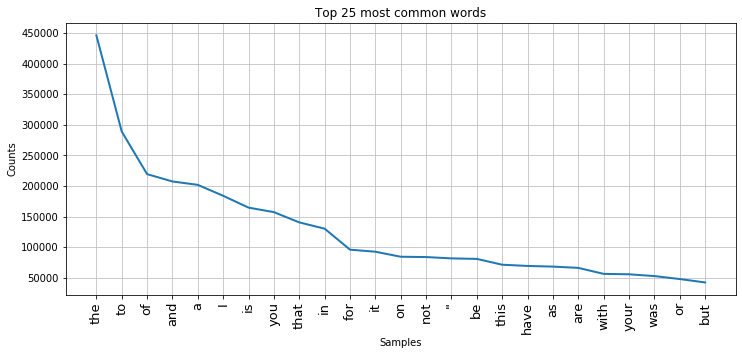

In [69]:
all_words = []
for line in list(df['comment_text']):
    words = line.split()
    for word in words:
        all_words.append(word)
plt.figure(figsize =(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize = 13, rotation =90)
fd = nltk.FreqDist(all_words)
fd.plot(25, cumulative=False)

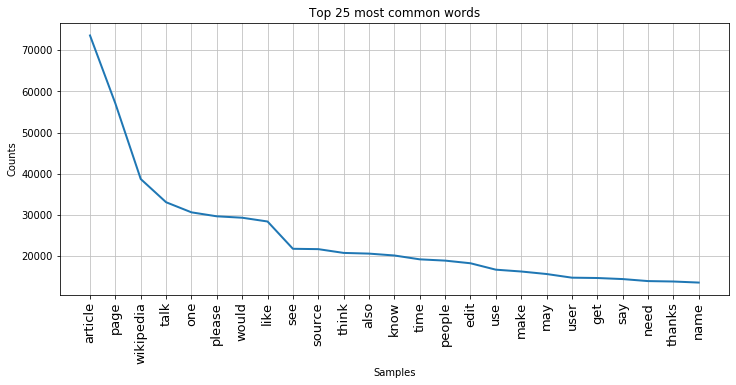

In [70]:
all_words = []
for line in list(df['cleaned_comments']):
    words = line.split()
    for word in words:
        all_words.append(word)
plt.figure(figsize =(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize = 13, rotation =90)
fd = nltk.FreqDist(all_words)
fd.plot(25, cumulative=False)

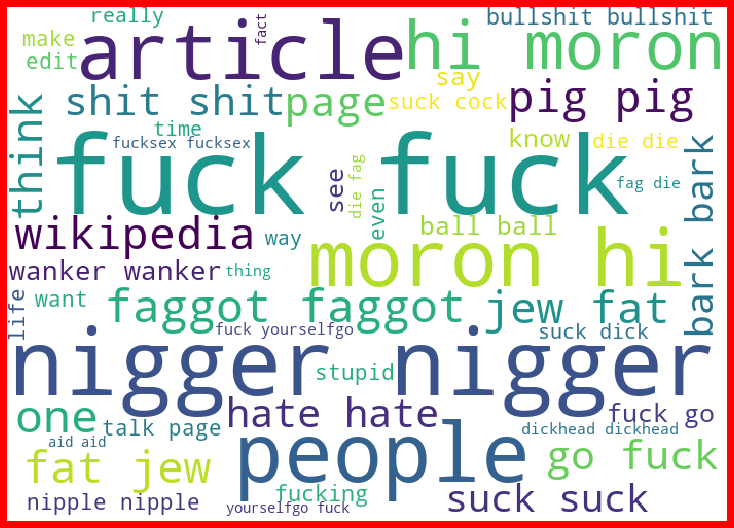

In [72]:

from wordcloud import WordCloud


fake = df['cleaned_comments'][df['malignant']==1]

fake_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(fake))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [74]:
df.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe', 'cleaned_comments'],
      dtype='object')

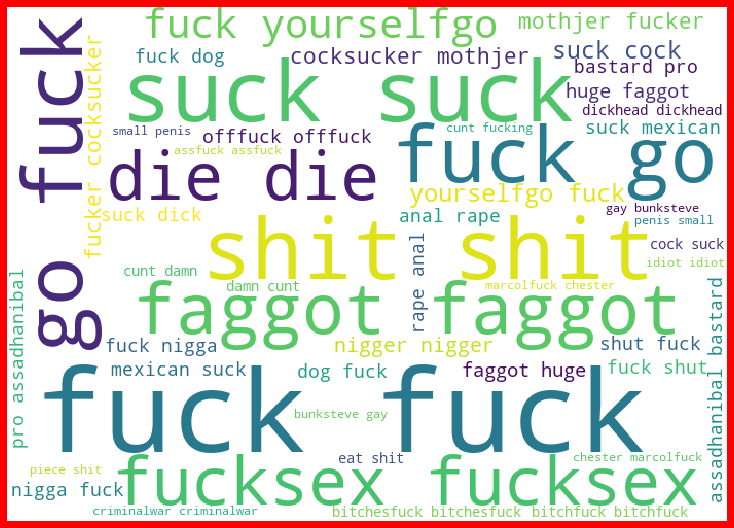

In [76]:

from wordcloud import WordCloud


fake = df['cleaned_comments'][df['highly_malignant']==1]

fake_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(fake))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

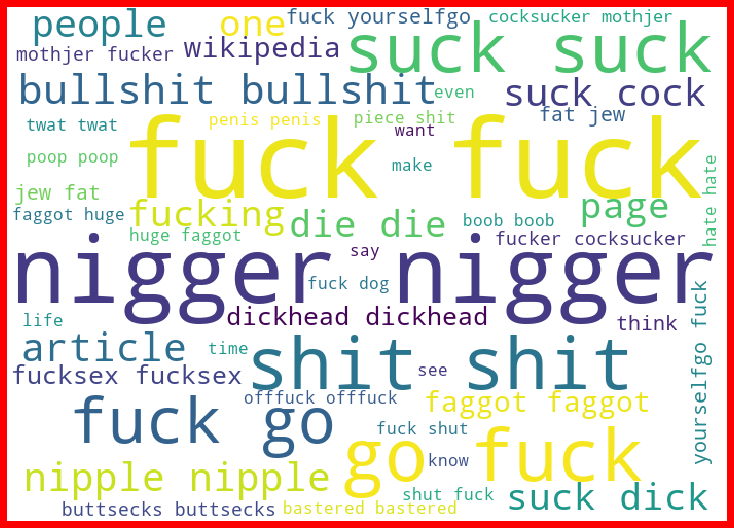

In [77]:
 
from wordcloud import WordCloud


fake = df['cleaned_comments'][df['rude']==1]

fake_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(fake))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

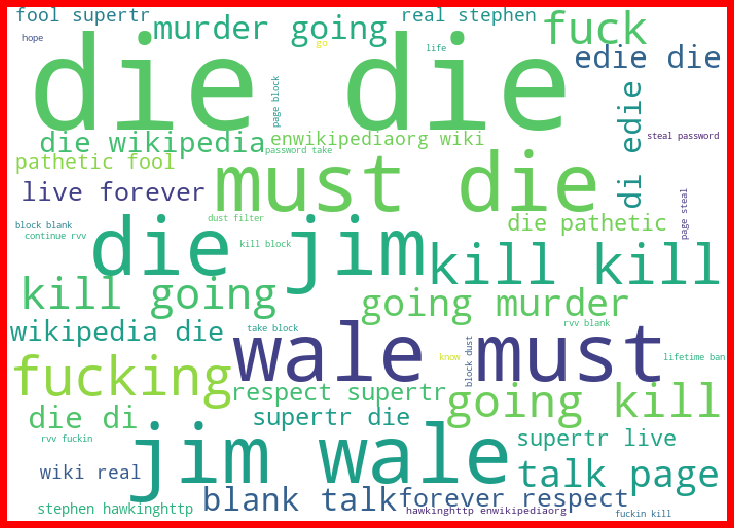

In [78]:

from wordcloud import WordCloud


fake = df['cleaned_comments'][df['threat']==1]

fake_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(fake))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

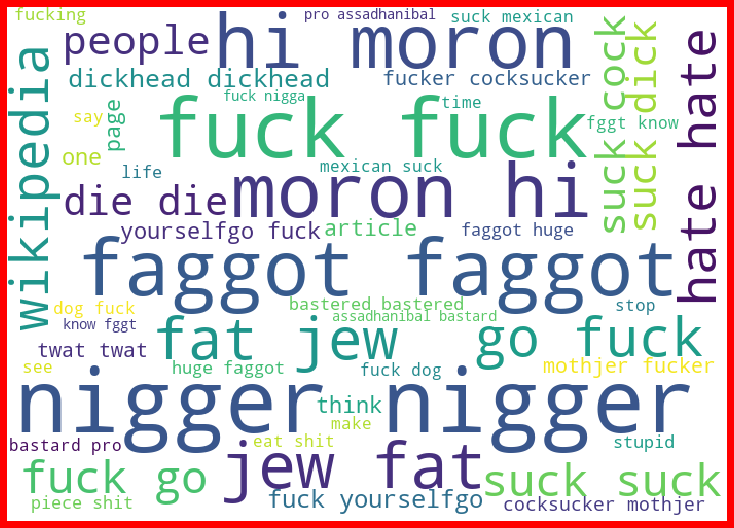

In [79]:

from wordcloud import WordCloud


fake = df['cleaned_comments'][df['abuse']==1]

fake_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(fake))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

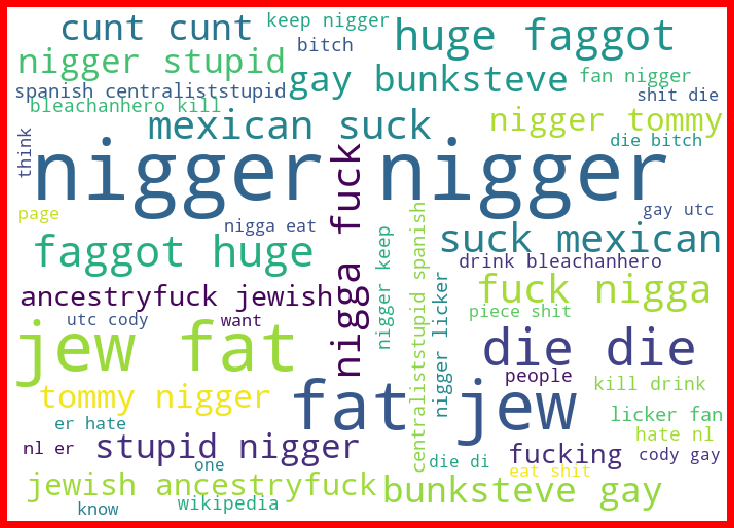

In [75]:

from wordcloud import WordCloud


fake = df['cleaned_comments'][df['loathe']==1]

fake_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(fake))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# Checking loud words for non malignant comments

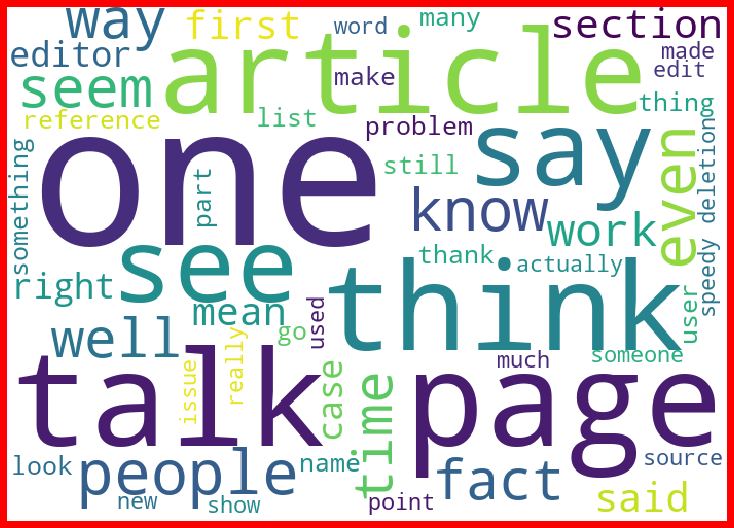

In [81]:

from wordcloud import WordCloud


fake = df['cleaned_comments'][df['malignant']==0]

fake_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(fake))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

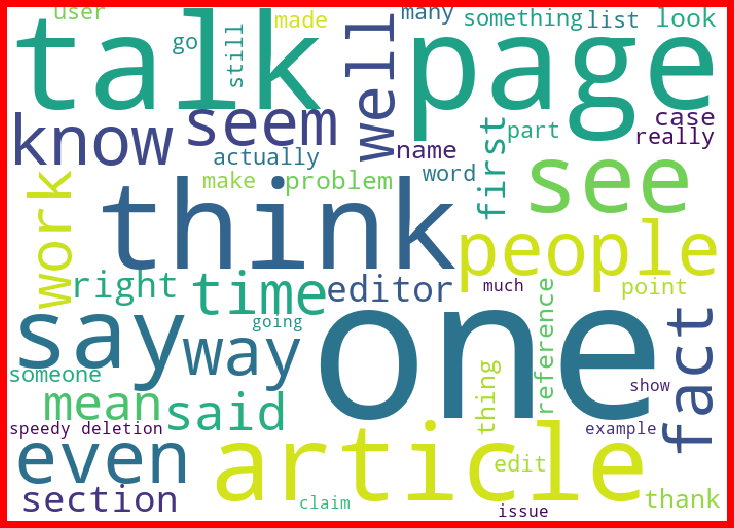

In [82]:

from wordcloud import WordCloud


fake = df['cleaned_comments'][df['highly_malignant']==0]

fake_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(fake))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

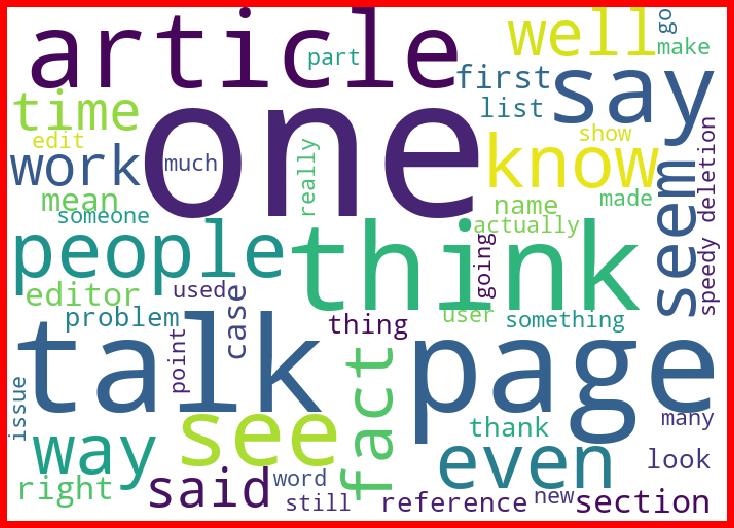

In [83]:

from wordcloud import WordCloud


fake = df['cleaned_comments'][df['rude']==0]

fake_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(fake))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

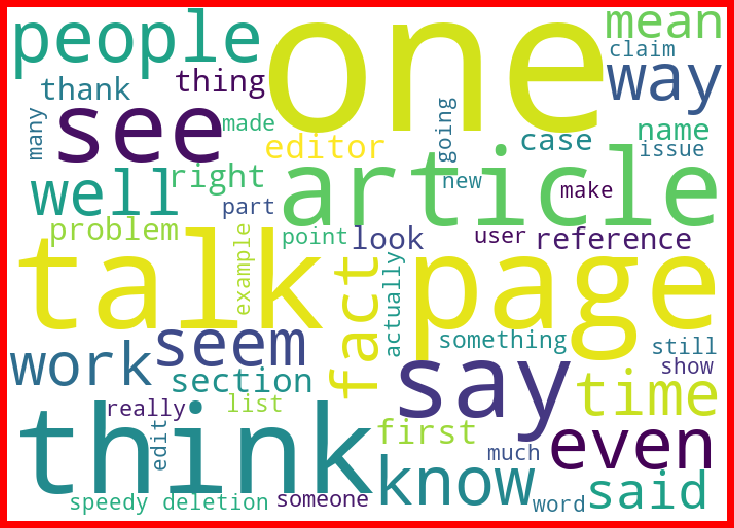

In [84]:

from wordcloud import WordCloud


fake = df['cleaned_comments'][df['threat']==0]

fake_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(fake))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

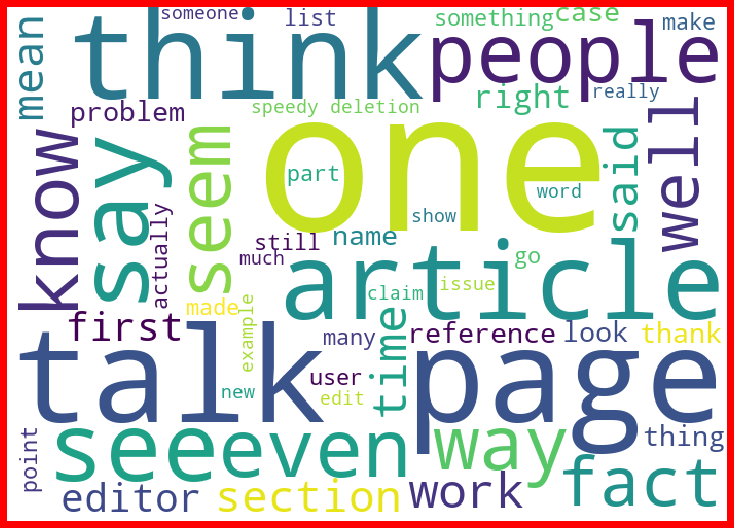

In [85]:
 
from wordcloud import WordCloud


fake = df['cleaned_comments'][df['abuse']==0]

fake_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(fake))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

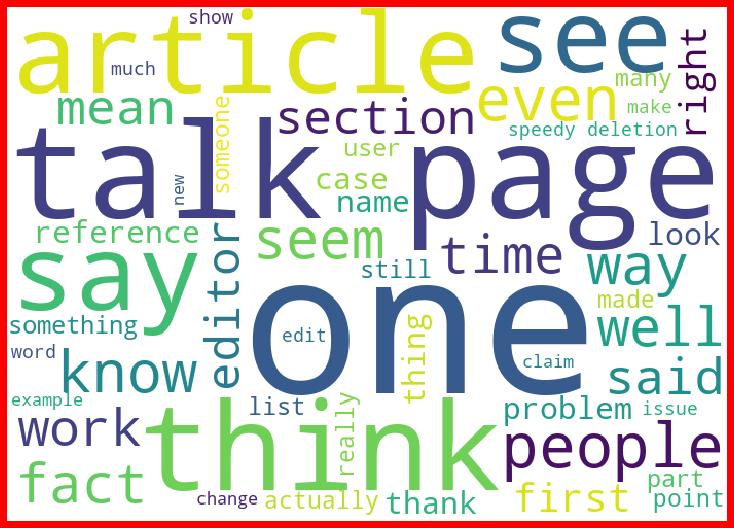

In [86]:

from wordcloud import WordCloud


fake = df['cleaned_comments'][df['loathe']==0]

fake_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(fake))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()